# TUGAS O3 Analisis Numerik

### Nama : Retno Puji Astuti
### Kelas : A
### NPM : 24083010080

# Noisy Data

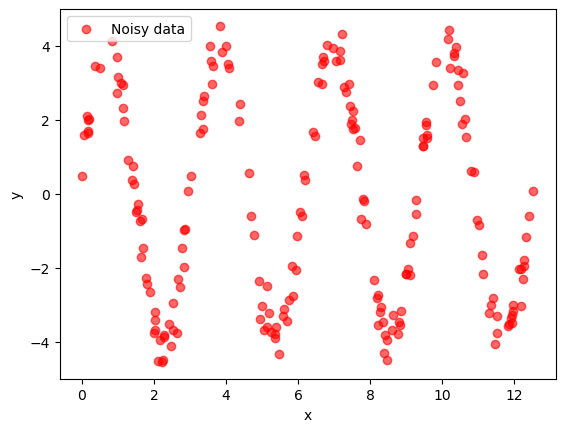

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
n = 200
NPM = 80

# Generate random x values between 0 and 4π
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)

# Original function
y_true = 4 * np.sin(2*x + 0.2)

# Add Gaussian noise
noise = np.random.normal(0, 0.4, n)  # mean=0, std=0.5
y_noisy = y_true + noise

# Plot
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)
# plt.plot(np.sort(x), 4*np.sin(4*np.sort(x) + 0.2), label="True function", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# TUGAS: temukan kembali fungsi asli dengan interpolasi dari titik-titik data acak (y_noisy)

### Penjelasan :
* Data ditas merupakan data yang dibuat dari x acak dalam interval [0, 4π]
* fungsi aslinya adalah y = 4sin(2x + 0.2)
* penambahan noise dengan gaussian (mean = 0 dan std = 0.4)
* visualisasi awal hanya menampilkan noisy data/titik merah, sehingga masih dalam tapah penyiapan data dan belum ada proses interpolasi/fitting.

# Polinomial Regresi Orde Tinggi

Degree 3 Polynomial:
  Persamaan: y ≈ 2.1738 + -2.0029*x^1 + 0.3865*x^2 + -0.0207*x^3
  RMSE = 2.6415

Degree 5 Polynomial:
  Persamaan: y ≈ 3.5815 + -5.3463*x^1 + 2.2299*x^2 + -0.4045*x^3 + 0.0337*x^4 + -0.0011*x^5
  RMSE = 2.6082

Degree 9 Polynomial:
  Persamaan: y ≈ -3.8315 + 54.0913*x^1 + -94.3016*x^2 + 66.8136*x^3 + -24.8796*x^4 + 5.3849*x^5 + -0.7011*x^6 + 0.0541*x^7 + -0.0023*x^8 + 0.0000*x^9
  RMSE = 2.0589

Degree 15 Polynomial:
  Persamaan: y ≈ 0.6029 + 7.8732*x^1 + 4.3665*x^2 + -30.6506*x^3 + 47.3673*x^4 + -47.0094*x^5 + 30.5472*x^6 + -12.9385*x^7 + 3.6576*x^8 + -0.7073*x^9 + 0.0949*x^10 + -0.0088*x^11 + 0.0006*x^12 + -0.0000*x^13 + 0.0000*x^14 + -0.0000*x^15
  RMSE = 0.3708



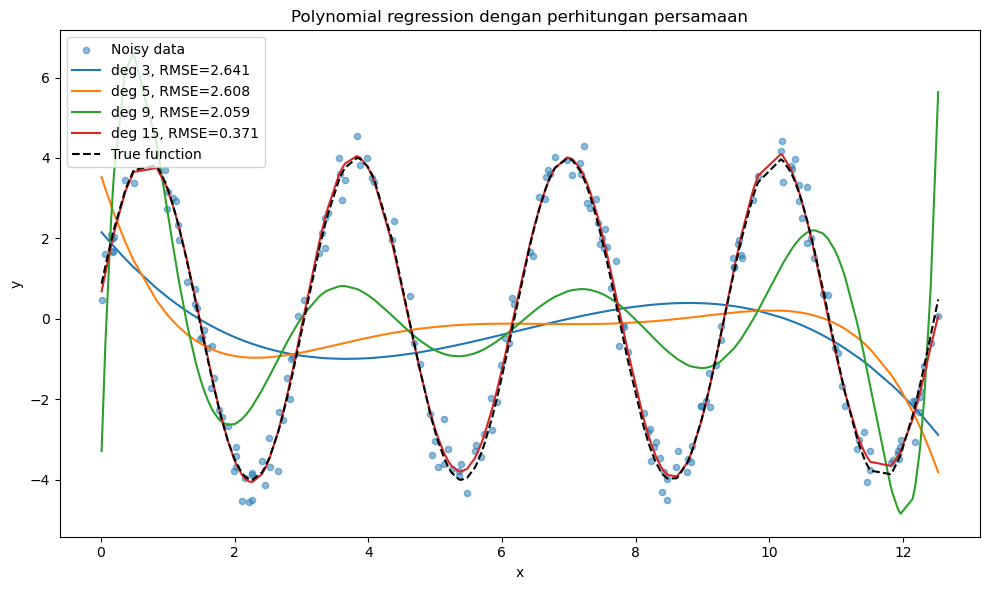

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Data
n = 200
NPM = 80
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)
y_true = 4 * np.sin(2*x + 0.2)
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# Mengurutkan data berdasarkan nilai x
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_true_sorted = y_true[sort_idx]
y_noisy_sorted = y_noisy[sort_idx]

# Polynomial fit dengan beberapa degree berbeda
degrees = [3, 5, 9, 15]
results = []
plt.figure(figsize=(10,6))
plt.scatter(x, y_noisy, label="Noisy data", alpha=0.5, s=20)

for deg in degrees:
    # Fit polynomial
    poly = Polynomial.fit(x, y_noisy, deg).convert()  # convert ke basis standar
    coeffs = poly.coef
    
    # Prediksi
    y_fit = poly(x)
    y_fit_sorted = poly(x_sorted)
    
    # Hitung RMSE
    rmse = np.sqrt(np.mean((y_noisy - y_fit)**2))
    results.append((deg, rmse))
    
    # Cetak persamaan polinomial
    terms = [f"{coeffs[i]:.4f}*x^{i}" if i>0 else f"{coeffs[i]:.4f}" for i in range(len(coeffs))]
    equation = " + ".join(terms)
    print(f"Degree {deg} Polynomial:")
    print(f"  Persamaan: y ≈ {equation}")
    print(f"  RMSE = {rmse:.4f}\n")
    
    # Plot
    plt.plot(x_sorted, y_fit_sorted, label=f"deg {deg}, RMSE={rmse:.3f}")

# Plot fungsi asli
plt.plot(x_sorted, y_true_sorted, "k--", label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial regression dengan perhitungan persamaan")
plt.legend()
plt.tight_layout()
plt.show()

### Penjelasan : 
* jika ingin membandingkan regresi polinomial dengan beberapa orde diperlukan fungsi "Polynomial.fit" untuk menghitung perbandingan dengan hasil yang lebih akurat.
* data asli mengandung noise, jadi simulasi yang akan dibuat dapat diuji apakah mampu menangkap pola sebenarnya :
  1. "y_true" : fungsi asli yang akan didekati, dengan sinus dengan amplitudo = 4, frekuensi = 2 dan fase = 0,2
  2. "noise" : nilai acak dengan distribusi normal, rata-rata = 0 dan simpangan = 0,4
  3. "y_noisy" : data observasi yang mirip dengan kondisi nyata, perhitungannya : y_noisy = fungsi + noise
* pengurutan data dilakukan agar garis pada kurva dapat terlihat halus dan tidak acak-acakan/berantakan, sehinga data asli tidak berurutan karena diambil secara acak.
* fitting polinomial menggunakan beberapa degrees untuk membandingkan bagaimana model sederhana/orde rendah dengan model kompleks/orde tinggi yang mendekati data :
  1. ".convert" : digunakan agar persamaannya dapat dicetak dalam bentuk cara umum
  2. RMSE dipakai sebagai metrik objektif untuk menilai seberapa bagus fitting model polinomial terhadap data.
  3. menampilkan loop untuk membentuk persamaan polinomial, sehingga hasil persamaan matematis tidak hanya berupa plot namun erdapat perhitungannya juga.
* visualisasi fungsi asli : digunakan untuk membandingkan ground truth, sehingga dapat menilai apakah polinomial benar-benar merepresentasikan sinyal atau malah hanya mengikuti noise.
* keunggulan regresi polinomial orde :
  1. metode paling sederhana dan umum untuk aproksimasi (nilai yang sebenarnya namun tidak sama persis dengan nilai asli) fungsi nonlinier.
  2. Dengan mencoba berbagai orde, dapat melihat efek underfitting (orde rendah : tidak cukup fleksibel) vs overfitting (orde tinggi : terlalu mengikuti noise).
  3. Walau polinomial bukan model ideal untuk sinusoidal, namun dapat digunakan untuk memahami regresi dan fitting.

# Sinusoidal Parametris Fitting

Hasil Parametric Sinusoidal Fit:
A (amplitudo) = 3.9739
B (frekuensi) = 1.9980
C (fase)      = 0.2081
D (offset)    = 0.0495
RMSE          = 0.3796


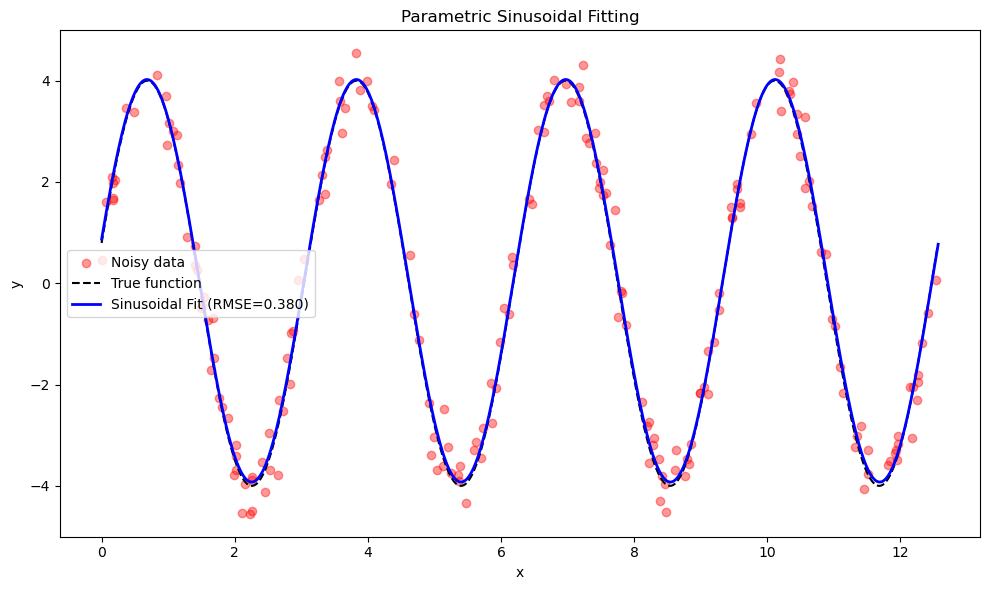

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
n = 200
NPM = 80
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)
y_true = 4 * np.sin(2*x + 0.2)
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# Untuk plotting lebih halus
x_sorted = np.linspace(0, 4*np.pi, 500)
y_true_sorted = 4 * np.sin(2*x_sorted + 0.2)

# Parametric Sinusoidal Fit
def sinus_model(x, A, B, C, D):
    return A * np.sin(B*x + C) + D

# Initial guess (A, B, C, D)
p0 = [4, 2, 0.2, 0]

# Fitting
popt, pcov = curve_fit(sinus_model, x, y_noisy, p0=p0)
A, B, C, D = popt

# Hasil prediksi
y_fit = sinus_model(x_sorted, A, B, C, D)

# Hitung RMSE
y_pred_all = sinus_model(x, A, B, C, D)
rmse = np.sqrt(np.mean((y_noisy - y_pred_all)**2))

# Output hasil
print("Hasil Parametric Sinusoidal Fit:")
print(f"A (amplitudo) = {A:.4f}")
print(f"B (frekuensi) = {B:.4f}")
print(f"C (fase)      = {C:.4f}")
print(f"D (offset)    = {D:.4f}")
print(f"RMSE          = {rmse:.4f}")

# Plot
plt.figure(figsize=(10,6))
plt.scatter(x, y_noisy, alpha=0.4, color="red", label="Noisy data")
plt.plot(x_sorted, y_true_sorted, "k--", label="True function")
plt.plot(x_sorted, y_fit, "b-", linewidth=2, label=f"Sinusoidal Fit (RMSE={rmse:.3f})")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Parametric Sinusoidal Fitting")
plt.legend()
plt.tight_layout()
plt.show()

### Penjelasan : 
* mencoba menemukan kembali fungsi sinusoidal asli dari data yang penuh noise dengan cara fitting model sinusoidal parametris.
* hasilnya bisa ditampilkan lewat parameter estimasi (A,B,C,D) dan metrik akurasi RMSE:
  1. bentuk umum model sinusoidal parametris :
     a. A = amplitudo
     b. B = frekuensi
     c. C = fase (geseran ke kiri/kanan)
     d. D = offset (geseran ke atas/bawah)
  2. memberikan initial guess agar fungsi fitting punya titik awal yang mendekati fungsi asli. misalnya A = 4, B = 2, C = 0,2 dan D = 0
  3. RMSE (Root Mean Square Error) mengukur rata-rata selisih antara data noisy dengan prediksi model.
* visualisasi yang dihasilkan dapat membantu membandingkan fungsi asli, data noisy, dan hasil sinusoidal parametris fitting.

# Perbandingan kedua kurva

=== Polynomial Fits ===
Degree 3 → RMSE = 2.6415
Degree 5 → RMSE = 2.6082
Degree 9 → RMSE = 2.0589
Degree 15 → RMSE = 0.3708

=== Sinusoidal Fit ===
A = 3.9739, B = 1.9980, C = 0.2081, D = 0.0495
RMSE = 0.3796


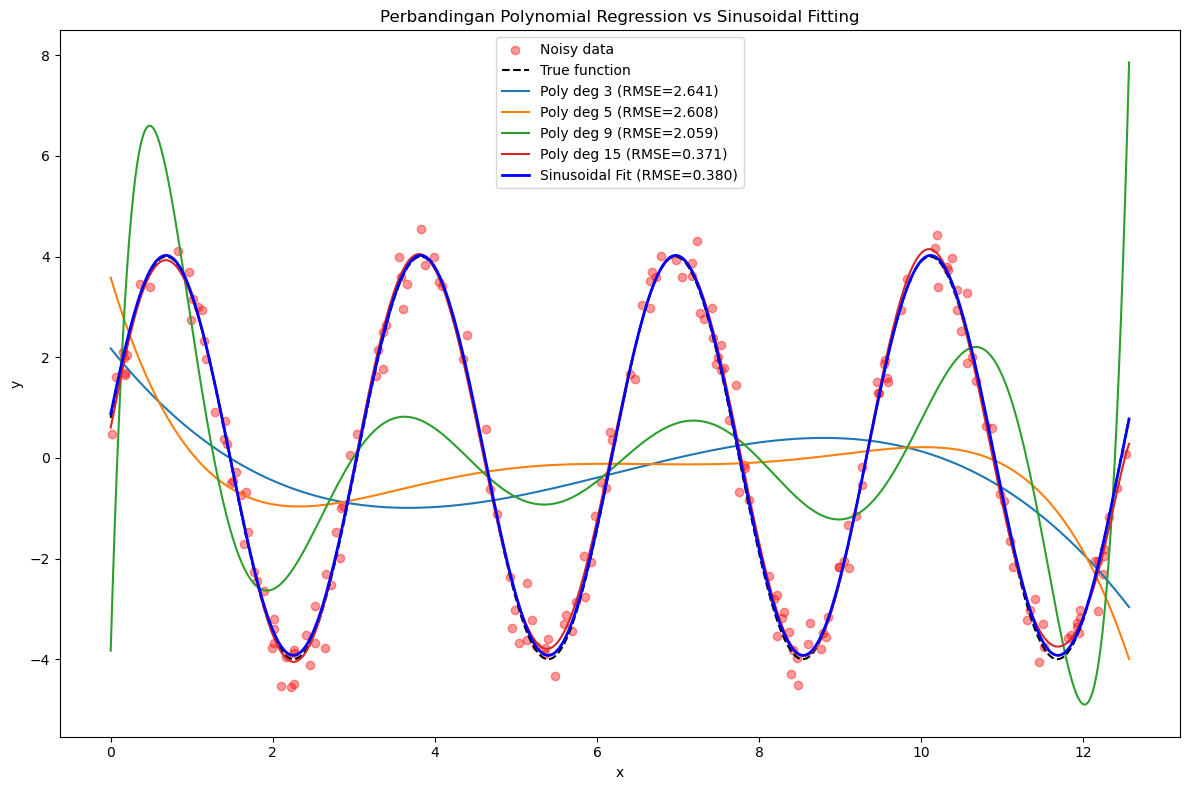

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit

# Data
n = 200
NPM = 80
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)
y_true = 4 * np.sin(2*x + 0.2)
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# Sort data untuk plot rapi
x_sorted = np.linspace(0, 4*np.pi, 500)
y_true_sorted = 4 * np.sin(2*x_sorted + 0.2)

# Polynomial Regression
degrees = [3, 5, 9, 15]
poly_preds = {}
rmse_poly = {}

for deg in degrees:
    poly = Polynomial.fit(x, y_noisy, deg).convert()
    y_fit_sorted = poly(x_sorted)
    poly_preds[deg] = y_fit_sorted
    
    # RMSE di semua titik asli
    y_fit_all = poly(x)
    rmse_poly[deg] = np.sqrt(np.mean((y_noisy - y_fit_all)**2))

# Parametric Sinusoidal Fitting
def sinus_model(x, A, B, C, D):
    return A * np.sin(B*x + C) + D

p0 = [4, 2, 0.2, 0]
popt, _ = curve_fit(sinus_model, x, y_noisy, p0=p0)
A, B, C, D = popt
y_sinus_fit = sinus_model(x_sorted, A, B, C, D)
rmse_sinus = np.sqrt(np.mean((y_noisy - sinus_model(x, *popt))**2))

# Print hasil numerik
print("=== Polynomial Fits ===")
for deg in degrees:
    print(f"Degree {deg} → RMSE = {rmse_poly[deg]:.4f}")
    
print("\n=== Sinusoidal Fit ===")
print(f"A = {A:.4f}, B = {B:.4f}, C = {C:.4f}, D = {D:.4f}")
print(f"RMSE = {rmse_sinus:.4f}")

# Plot perbandingan
plt.figure(figsize=(12,8))
plt.scatter(x, y_noisy, alpha=0.4, color="red", label="Noisy data")
plt.plot(x_sorted, y_true_sorted, "k--", label="True function")

# Polinomial
for deg in degrees:
    plt.plot(x_sorted, poly_preds[deg], label=f"Poly deg {deg} (RMSE={rmse_poly[deg]:.3f})")

# Sinusoidal
plt.plot(x_sorted, y_sinus_fit, color="blue", linewidth=2, label=f"Sinusoidal Fit (RMSE={rmse_sinus:.3f})")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Perbandingan Polynomial Regression vs Sinusoidal Fitting")
plt.legend()
plt.tight_layout()
plt.show()

### Penjelasan :
* kurva pertama :
  1. menebak pola data dengan menggunakan garis lengkung polinomial untuk mencari fungsi aslinya.
  2. masing-masing grafik memiliki nilai dimana semakin besar ordenya, maka semakin mendekati nilai asli dari perhitungan matematisnya. sebaliknya, jika menggunakan orde rendah maka perhitungan nilai garisnya melewati/diluar data aslinya.
  3. jika terlalu banyak grafik yang melengkung jauh dari data noisenya maka nilai data pada ujung grafik akan overfitting.

* kurva kedua :
  1. menebak pola data dengan menggunakan rumus sinusoidal, kemudian mengatur ulang nilai masing-masing parameter nya seperti, tinggi gelombang, lebar gelombang dan geserannya.
  2. grafik yang dihasilkan akan membentuk data secara alami, sehingga lebih mirip dengan data noise dan fungsi aslinya.

* kurva ketiga :
  1. menggabungkan seluruh grafik pada kurva pertama dan kedua, lalu membandingkannya dengan data aslinya.
  2. grafik yang mendekati nilai aslinya :
     a. metode polinomial dengan menggunakan degree 15 = 0,371
     b. metode sinusoidal fitting dengan hasil = 0,380
  3. kesimpulannya penggunaan metode sinusoidal parametris lebih disarankan dibandingkan dengan perhitungan besar menggunakan metode polinomial regresi, karena data yang digunakan memiliki pola periodik/bergelombang sehingga lebih cepat menghasilkan pola grafik dasar dari fungsi aslinya serta menghindari overfitting. 